# ELECTRIC MOTOR MAGNET TEMPERATURE PREDECTIVE AI
**(HERE WE ARE GOING TO PREDICT THE TEMPERATURE OF THE PERMANENT MAGNET INSIDE THE PSMS MOTOR(Permanent Magnet Synchronous Motor)).**  

# **PART 1 OF PROJECT - EDA ANALYSIS**

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
!pip install gdown

import gdown
import pandas as pd

file_id = "10P2e-m0FcrgHKrPH98UoyybQ46gv9Nvt"
url = f"https://drive.google.com/uc?id={file_id}"
output = "project_dataset.csv"

gdown.download(url, output, quiet=False)
df = pd.read_csv(output)
print(df.head())


Downloading...
From (original): https://drive.google.com/uc?id=10P2e-m0FcrgHKrPH98UoyybQ46gv9Nvt
From (redirected): https://drive.google.com/uc?id=10P2e-m0FcrgHKrPH98UoyybQ46gv9Nvt&confirm=t&uuid=ece27b74-e2b7-469a-8537-636e97b02ae9
To: /content/project_dataset.csv
100%|██████████| 156M/156M [00:03<00:00, 46.6MB/s]


        u_q    coolant  stator_winding       u_d  stator_tooth  motor_speed  \
0 -0.450682  18.805172       19.086670 -0.350055     18.293219     0.002866   
1 -0.325737  18.818571       19.092390 -0.305803     18.294807     0.000257   
2 -0.440864  18.828770       19.089380 -0.372503     18.294094     0.002355   
3 -0.327026  18.835567       19.083031 -0.316199     18.292541     0.006105   
4 -0.471150  18.857033       19.082525 -0.332272     18.291428     0.003133   

        i_d       i_q         pm  stator_yoke    ambient    torque  profile_id  
0  0.004419  0.000328  24.554214    18.316547  19.850691  0.187101          17  
1  0.000606 -0.000785  24.538078    18.314955  19.850672  0.245417          17  
2  0.001290  0.000386  24.544693    18.326307  19.850657  0.176615          17  
3  0.000026  0.002046  24.554018    18.330833  19.850647  0.238303          17  
4 -0.064317  0.037184  24.565397    18.326662  19.850639  0.208197          17  


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

df = pd.read_csv("project_dataset.csv")
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292541,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


## **2] Exploratory Data Analysis**

In [ ]:
df = pd.read_csv("project_dataset.csv")
df.info()
df.isnull().sum()
df.describe()

print("Shape of dataset:", df.shape)
df.info()

print("\nMissing values:")
print(df.isnull().sum())

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1048575 non-null  float64
 1   coolant         1048575 non-null  float64
 2   stator_winding  1048575 non-null  float64
 3   u_d             1048575 non-null  float64
 4   stator_tooth    1048575 non-null  float64
 5   motor_speed     1048575 non-null  float64
 6   i_d             1048575 non-null  float64
 7   i_q             1048575 non-null  float64
 8   pm              1048575 non-null  float64
 9   stator_yoke     1048575 non-null  float64
 10  ambient         1048575 non-null  float64
 11  torque          1048575 non-null  float64
 12  profile_id      1048575 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 104.0 MB
Shape of dataset: (1048575, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (tot

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.333733e+01,3.232322e+01,6.430889e+01,-2.899370e+01,5.439572e+01,2.209956e+03,-7.092833e+01,4.330229e+01,5.691077e+01,4.525002e+01,2.423961e+01,3.623050e+01,3.549608e+01
std,4.336464e+01,2.027951e+01,2.968288e+01,6.223175e+01,2.323587e+01,1.874061e+03,6.660061e+01,9.159176e+01,2.001114e+01,1.948673e+01,1.940425e+00,7.673032e+01,2.506011e+01
min,-2.529093e+01,1.376190e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,1.410069e+01,-2.464667e+02,2.000000e+00
25%,1.209668e+01,1.860544e+01,3.937440e+01,-8.525315e+01,3.334926e+01,3.836995e+02,-1.192647e+02,1.096400e+00,3.900360e+01,2.877491e+01,2.309487e+01,-4.055462e-02,1.400000e+01
50%,4.752466e+01,1.926167e+01,6.356562e+01,-7.620751e+00,5.260343e+01,1.999976e+03,-5.073550e+01,2.992396e+01,5.760014e+01,3.972105e+01,2.411081e+01,2.089365e+01,2.900000e+01
75%,8.757509e+01,4.179416e+01,8.764565e+01,8.295827e-01,7.212174e+01,3.749966e+03,-2.980322e+00,1.131816e+02,7.169332e+01,5.869643e+01,2.591768e+01,9.801524e+01,5.700000e+01
max,1.330313e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,9.985647e+01,3.071420e+01,2.610057e+02,8.100000e+01


In [ ]:
print(df.columns)

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque',
       'profile_id'],
      dtype='object')


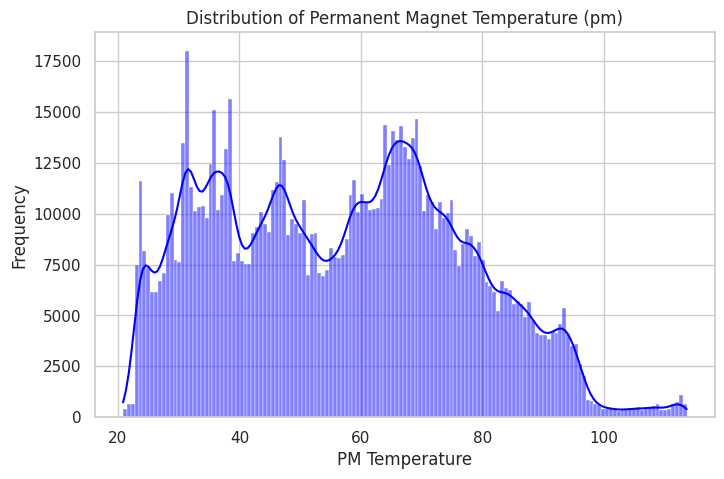

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Distribution of target variable (These is the distrubution of permanent magnet temp(pm) which is basically our target for this project)
plt.figure(figsize=(8,5))
sns.histplot(df['pm'], kde=True, color='blue')
plt.title('Distribution of Permanent Magnet Temperature (pm)')
plt.xlabel('PM Temperature')
plt.ylabel('Frequency')
plt.show()

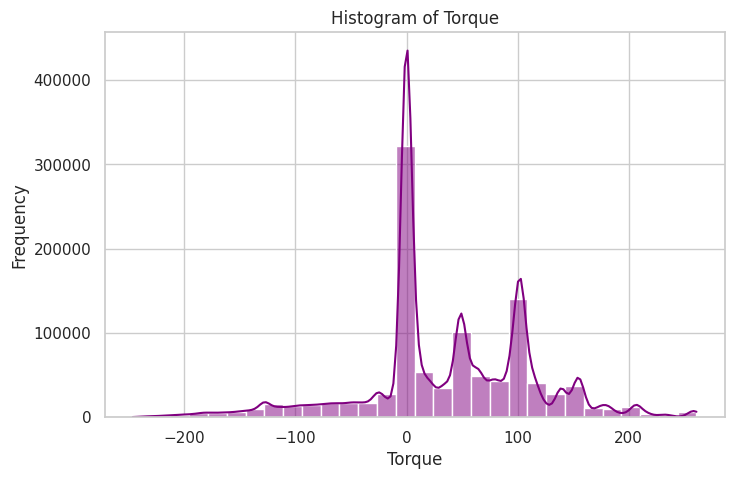

In [ ]:
# 2. Histogram of torque
plt.figure(figsize=(8,5))
sns.histplot(df['torque'], bins=30, kde=True, color='purple')
plt.title('Histogram of Torque')
plt.xlabel('Torque')
plt.ylabel('Frequency')
plt.show()

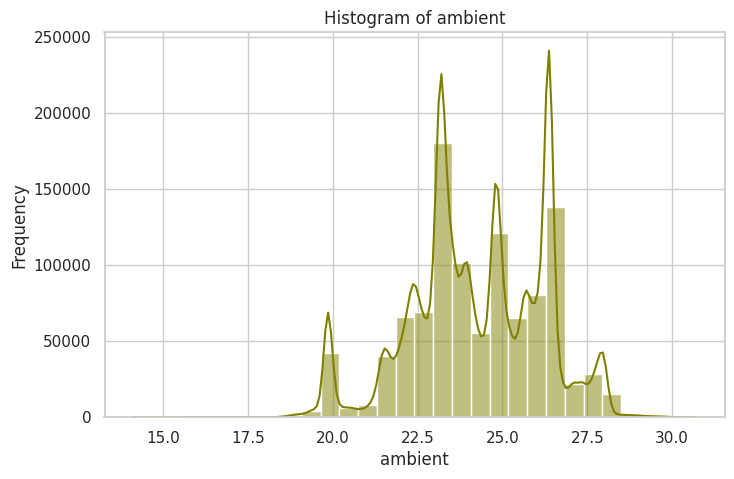

In [ ]:
# 3. Histogram of ambient temperature
plt.figure(figsize=(8,5))
sns.histplot(df['ambient'], bins=30, kde=True, color='olive')
plt.title('Histogram of ambient')
plt.xlabel('ambient')
plt.ylabel('Frequency')
plt.show()

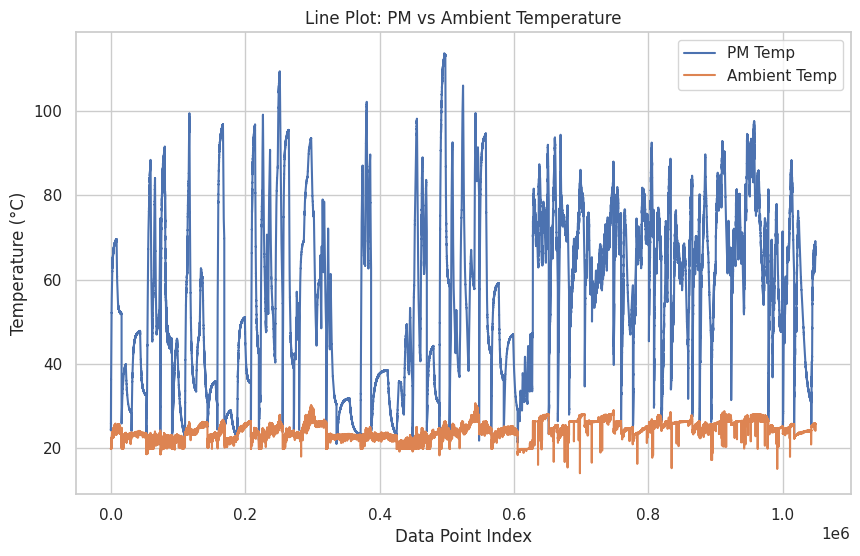

In [ ]:
# 4. LINEPLOT
plt.figure(figsize=(10,6))
plt.plot(df['pm'], label='PM Temp')
plt.plot(df['ambient'], label='Ambient Temp')
plt.title('Line Plot: PM vs Ambient Temperature')
plt.xlabel('Data Point Index')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

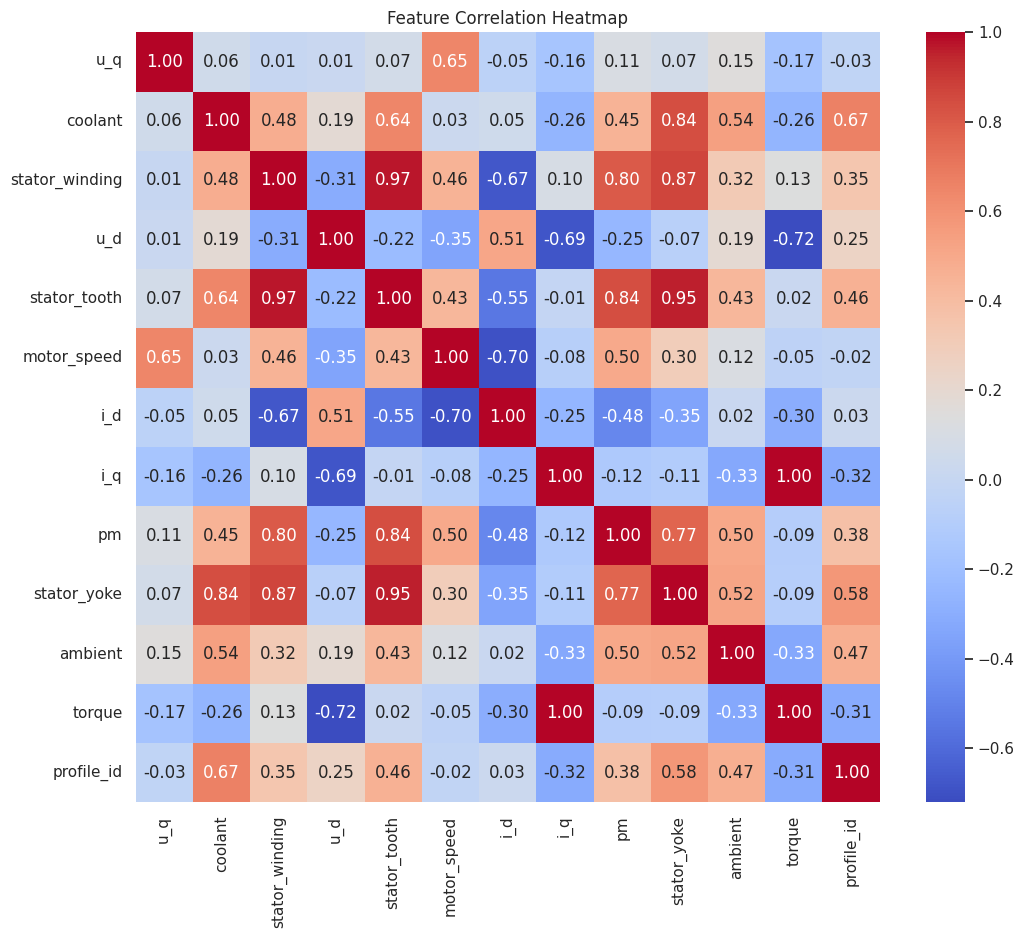

In [ ]:
# 5. Correlation Heatmap
plt.figure(figsize=(12,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

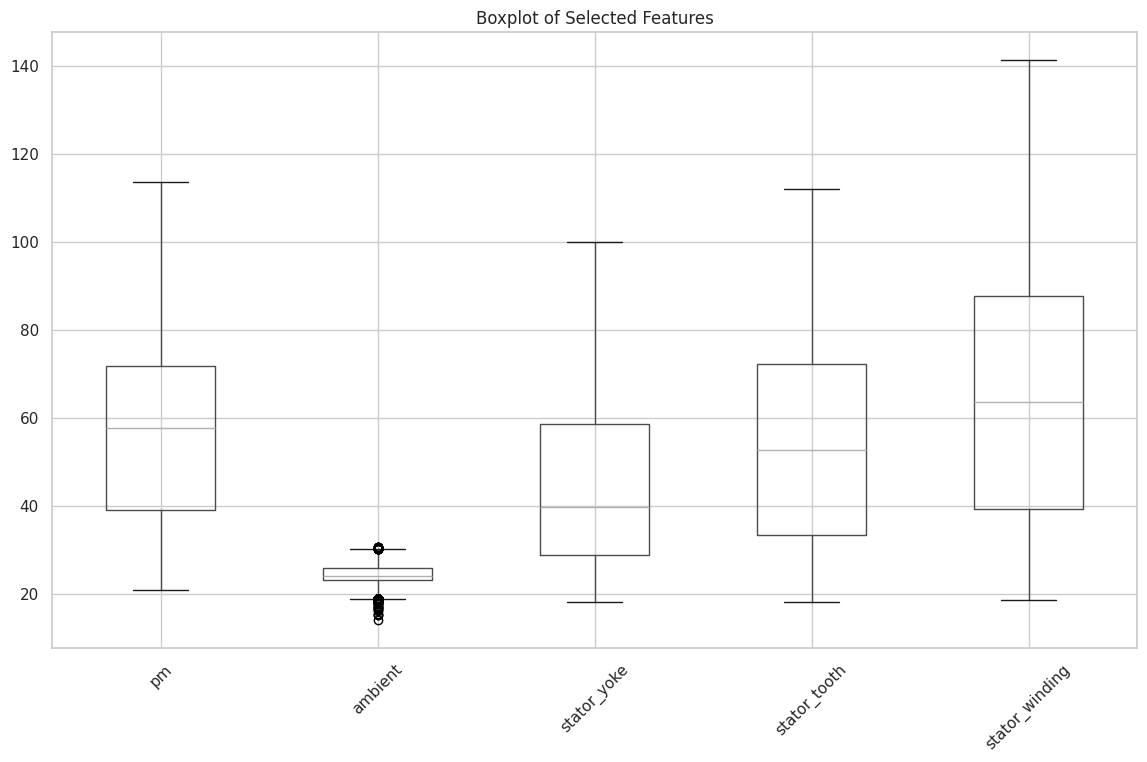

In [ ]:
# 6. Boxplot
plt.figure(figsize=(14,8))
df.boxplot(column=['pm', 'ambient', 'stator_yoke', 'stator_tooth', 'stator_winding'])
plt.title('Boxplot of Selected Features')
plt.xticks(rotation=45)
plt.show()

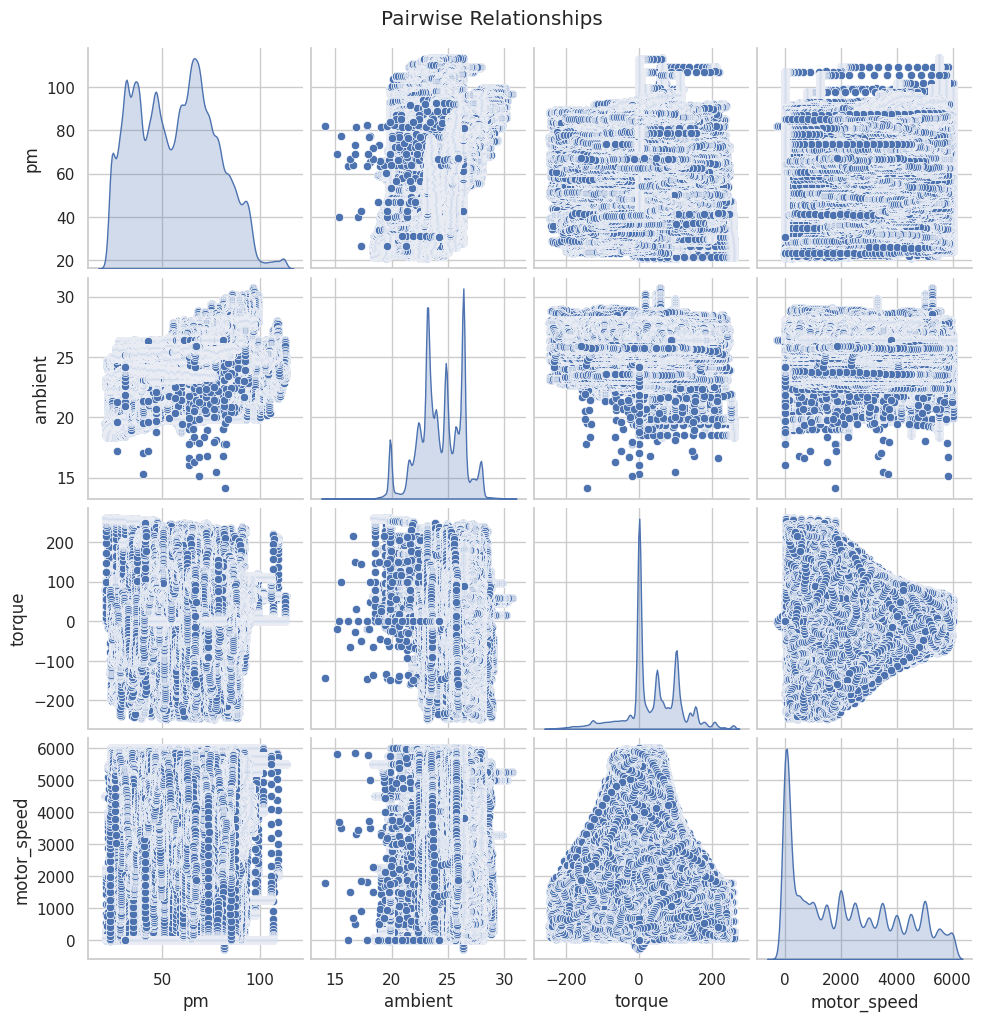

In [ ]:
# 7. Pairplot
sns.pairplot(df[['pm', 'ambient', 'torque', 'motor_speed']], diag_kind='kde')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

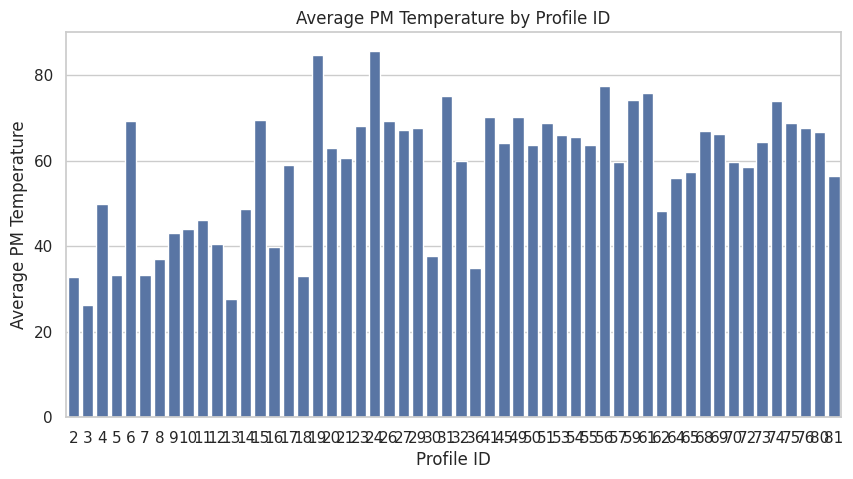

In [ ]:
#8.
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='profile_id', y='pm', estimator='mean', ci=None)
plt.title('Average PM Temperature by Profile ID')
plt.xlabel('Profile ID')
plt.ylabel('Average PM Temperature')
plt.show()

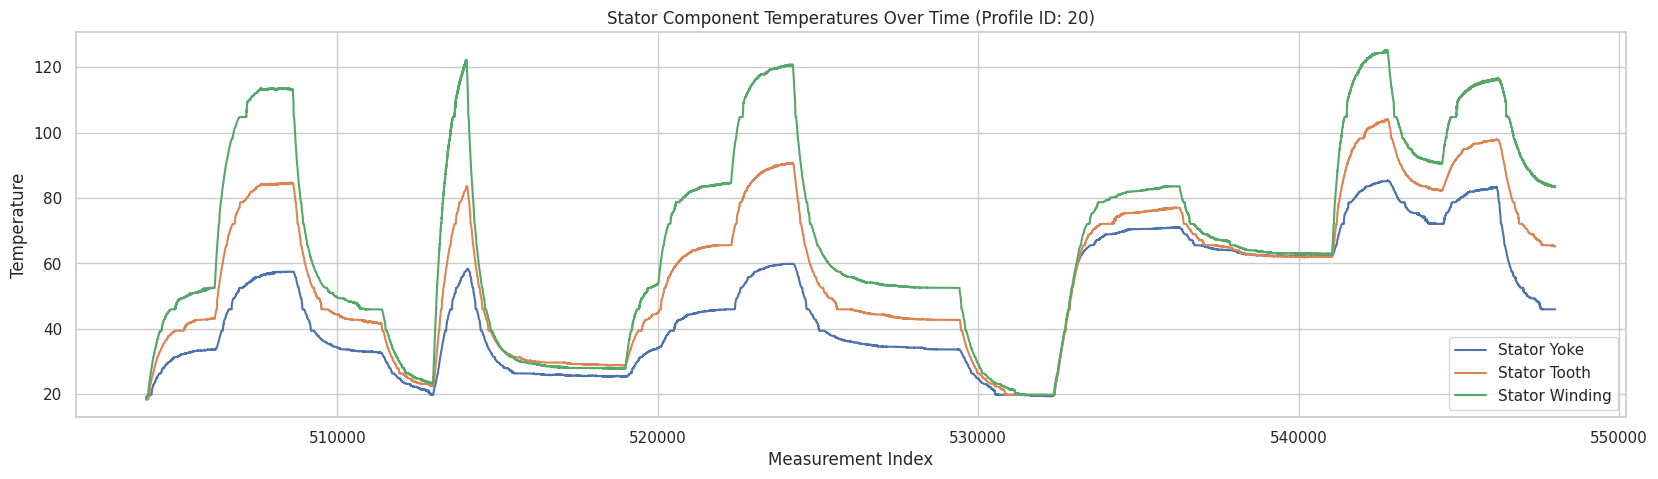

In [ ]:
#9.
plt.figure(figsize=(20, 5))

df[df['profile_id'] == 20]['stator_yoke'].plot(label='Stator Yoke')
df[df['profile_id'] == 20]['stator_tooth'].plot(label='Stator Tooth')
df[df['profile_id'] == 20]['stator_winding'].plot(label='Stator Winding')

plt.title("Stator Component Temperatures Over Time (Profile ID: 20)")
plt.xlabel("Measurement Index")
plt.ylabel("Temperature")
plt.legend()
plt.show()

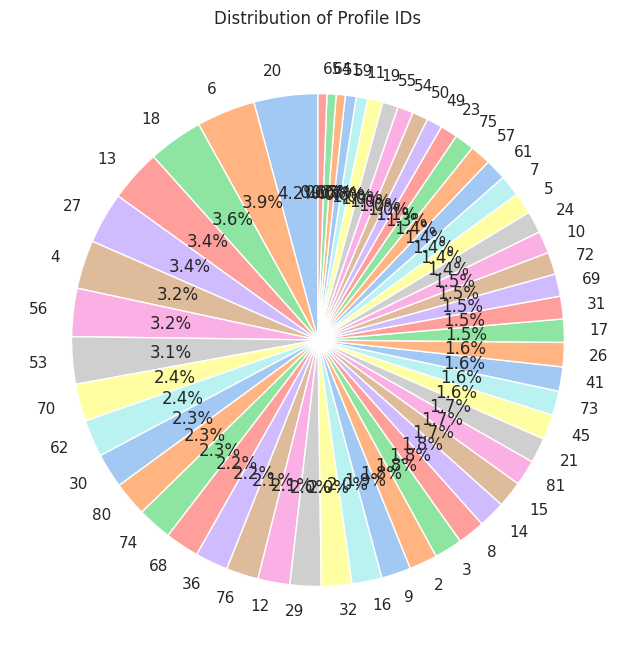

In [ ]:
#10.
plt.figure(figsize=(16,8))
df['profile_id'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Profile IDs')
plt.ylabel('')
plt.show()

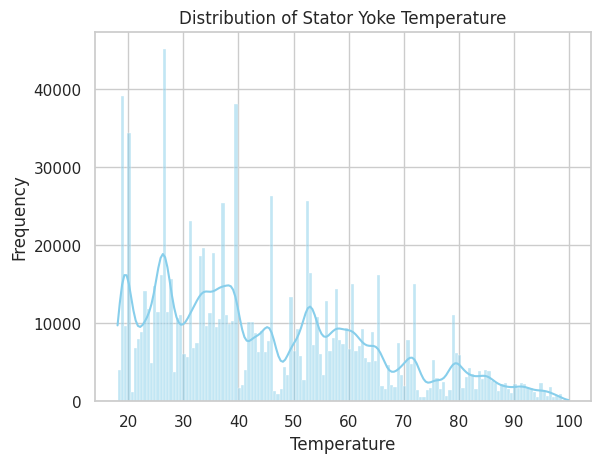

In [ ]:
# 11
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['stator_yoke'], kde=True, color='skyblue')
plt.title("Distribution of Stator Yoke Temperature")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()